# Titanic Data Analysis
##### by A F

This notebook expose a basic statistical analysis on a (reduced) dataset regarding RMS Titanic shipwreck.
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912. Officially the accident was caused by a collision with an iceberg during the ship's maiden voyage from Southampton to New York City, but according to other versions the sinking of the RMS Titanic may have been caused by fire on board. Of the 2,224 passengers and crew aboard 1502 died.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. One of the purpose of this analysis is to investigate about whether some groups of people were more likely to survive than others (for example women, children, upper-class) or not and which factors could have determined survival or death. 

In [1]:
#pandas, plots, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('./titanic_data.csv')
# df.head(5)
df.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The following are variable names and relative descriptions.

Survived: 	   survived (1) or died (0).

Pclass: 	   passenger’s class.

Name: 	       passenger’s name.

Sex:	       passenger’s sex.

Age: 	       passenger’s age.

SibSp: 	       number of siblings/spouses aboard.

Parch: 	       number of parents/children aboard.

Ticket: 	   ticket number.

Fare: 	       fare.

Cabin: 	       cabin.

Embarked: 	   port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
Age, Cabin and Embarked features contain null values. 

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Coutts, Master. William Loch ""William""",male,1601,B96 B98,S
freq,1,577,7,4,644


There are 891 unique records. Some cabins were associated with more than one passenger. A first correlation table only for numeric features is shown below.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Text xticklabel objects>)

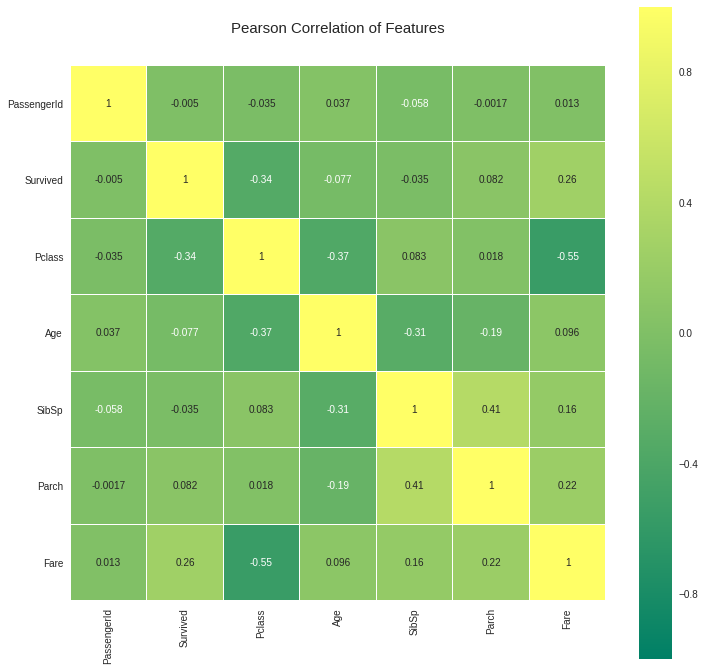

In [6]:
colormap = plt.cm.summer
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
df_num = df.drop(['Name', 'Cabin', 'Ticket', 'Name', 'Sex', 'Embarked'], axis=1)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Note the modest correlations between Survived feature and Fare (direct), Pclass (inverse) features. A plot of survival features is shown below.

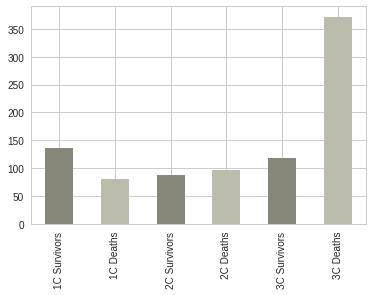

In [7]:
survivors = df[df['Survived'] == 1]
deaths = df[df['Survived'] == 0]

num_first_class_survivors = len(survivors[survivors['Pclass'] == 1])
num_second_class_survivors = len(survivors[survivors['Pclass'] == 2])
num_third_class_survivors = len(survivors[survivors['Pclass'] == 3])

num_first_class_deaths = len(deaths[deaths['Pclass'] == 1])
num_second_class_deaths = len(deaths[deaths['Pclass'] == 2])
num_third_class_deaths = len(deaths[deaths['Pclass'] == 3])

surv = pd.Series([num_first_class_survivors, num_first_class_deaths, num_second_class_survivors,\
                                num_second_class_deaths,num_third_class_survivors,\
                               num_third_class_deaths],\
                               index=['1C Survivors', '1C Deaths', '2C Survivors', '2C Deaths',\
                                      '3C Survivors', '3C Deaths'])

colors = ["#878779", "#bcbcad"]
surv.plot(kind='bar', color=colors)

Most of the deaths are related to third class passengers. The quotient 3rd class survivors / 3rd class passenger is low. First class passengers had more chance of survival.
Next, some visuals about age and survival and survival pecentage related to sex.

/home/pc/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


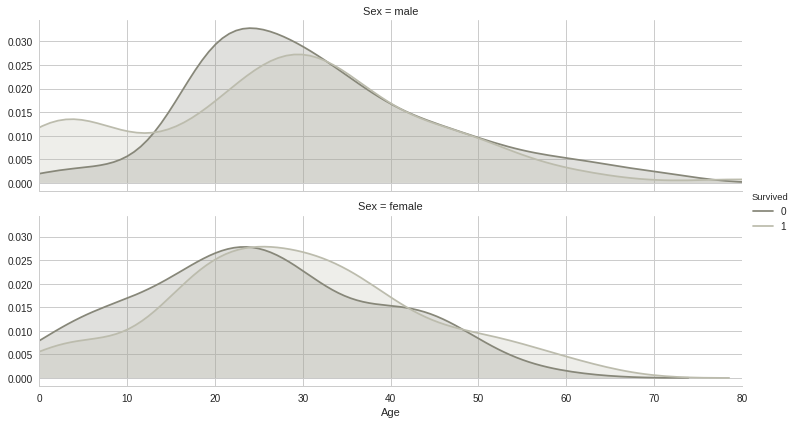

In [8]:
facet = sns.FacetGrid(df, hue="Survived", row = 'Sex', aspect=3.5, palette=colors)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

Male survivors: 109
Male deaths: 468
Number of males: 577
Proportion of male survivals: 0.18890814558058924


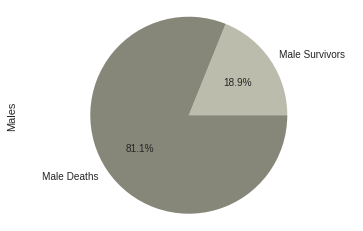

Female survivors: 233
Female deaths: 81
Number of females: 314
Proportion of female survivals: 0.7420382165605095


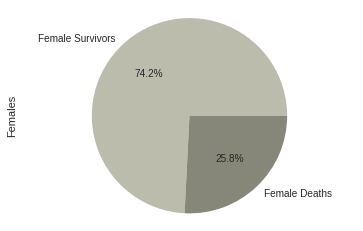

In [9]:
colors = ["#bcbcad", "#878779"]

num_males = len(df[df['Sex'] == 'male'])
num_females = len(df[df['Sex'] == 'female'])

num_male_survivors = len(survivors[survivors['Sex'] == 'male'])
num_female_survivors = len(survivors[survivors['Sex'] == 'female'])
num_male_non_survivors = len(deaths[deaths['Sex'] == 'male'])
num_female_non_survivors = len(deaths[deaths['Sex'] == 'female'])

male_survival = pd.Series([num_male_survivors, num_male_non_survivors], index=['Male Survivors', 'Male Deaths'], name='Males')
male_survival.plot(kind='pie',  autopct='%1.1f%%', colors=colors).axis('equal')

print('Male survivors: ' + str(num_male_survivors))
print('Male deaths: ' + str(num_male_non_survivors))
print('Number of males: ' + str(num_males))
print('Proportion of male survivals: ' + \
        str(float(num_male_survivors)/(num_male_survivors + num_male_non_survivors)))
plt.show()  

female_survival = pd.Series([num_female_survivors, num_female_non_survivors],
                    index=['Female Survivors', 'Female Deaths'], name='Females')
female_survival.plot(kind='pie',  autopct='%1.1f%%', colors=colors).axis('equal')

print('Female survivors: ' + str(num_female_survivors))
print('Female deaths: ' + str(num_female_non_survivors))
print('Number of females: ' + str(num_females))
print('Proportion of female survivals: ' + \
        str(float(num_female_survivors)/(num_female_survivors + num_female_non_survivors)))

df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

So most women survived. The proportion of male survivors is very low; instead female passengers survival is quite high (about 3/4 of female passengers survived).
In the following lines *embarked* feature will be analized in more detail.

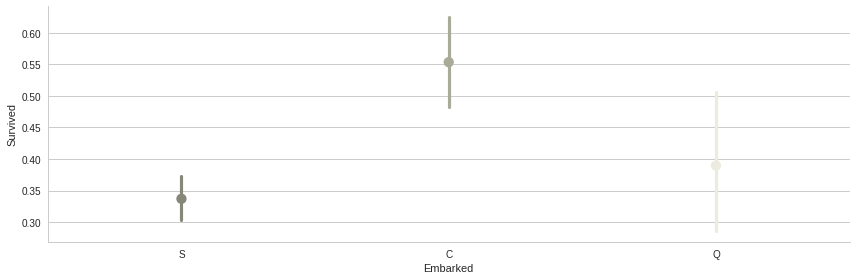

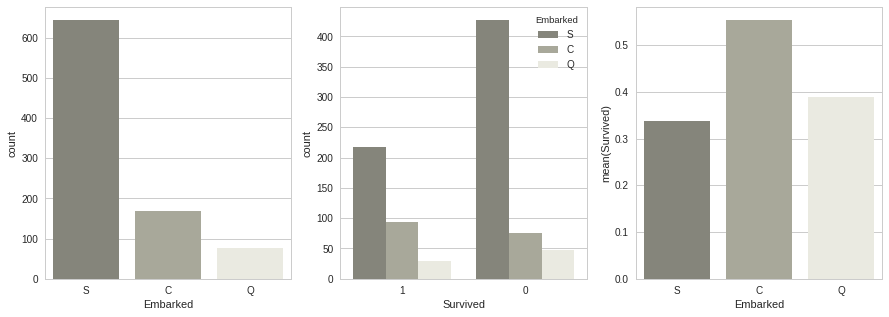

In [10]:
#Embark
colors = ["#878779", "#aaaa98", "#ebebe0"]
palette = sns.color_palette(colors)
sns.factorplot('Embarked','Survived', data=df,size=4,aspect=3, palette=palette)
# sns.violinplot('Embarked','Survived', data=df,size=4,aspect=3, palette=palette)
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=df, ax=axis1, palette=palette)
sns.countplot(x='Survived', hue="Embarked", data=df, order=[1,0], ax=axis2, palette=palette)
embark_perc = df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3, palette=palette)

The large majority of passengers embarked in Southampton.
The highest fraction of survived passengers was from those embarked in Cherbourg.
A little check for class gap survival can be found examining survival ratios for each town and verifying the percentage of 1st class passengers, as follows.

In [11]:
print("--- Survival ratio by port of embarkation ---")
fraction_S = float(len(df[(df.Embarked == 'S') & (df.Survived == True)].index)) / float(len(df[df.Embarked == 'S']))
fraction_C = float(len(df[(df.Embarked == 'C') & (df.Survived == True)].index)) / float(len(df[df.Embarked == 'C']))
fraction_Q = float(len(df[(df.Embarked == 'Q') & (df.Survived == True)].index)) / float(len(df[df.Embarked == 'Q']))
print("Southampton: ", fraction_S)
print("Cherbourg: ", fraction_C)
print("Queenstown: ", fraction_S)
print()
print("--- 1st class percentage by port of embarkation ---")
print("S 1st class ", float(len(df[(df.Embarked == 'S') & (df.Pclass == 1)])) / float(len(df[(df.Embarked == 'S')])))
print("C 1st class ", float(len(df[(df.Embarked == 'C') & (df.Pclass == 1)])) / float(len(df[(df.Embarked == 'C')])))
print("Q 1st class ", float(len(df[(df.Embarked == 'Q') & (df.Pclass == 1)])) / float(len(df[(df.Embarked == 'Q')])))

--- Survival ratio by port of embarkation ---
Southampton:  0.33695652173913043
Cherbourg:  0.5535714285714286
Queenstown:  0.33695652173913043

--- 1st class percentage by port of embarkation ---
S 1st class  0.1972049689440994
C 1st class  0.5059523809523809
Q 1st class  0.025974025974025976


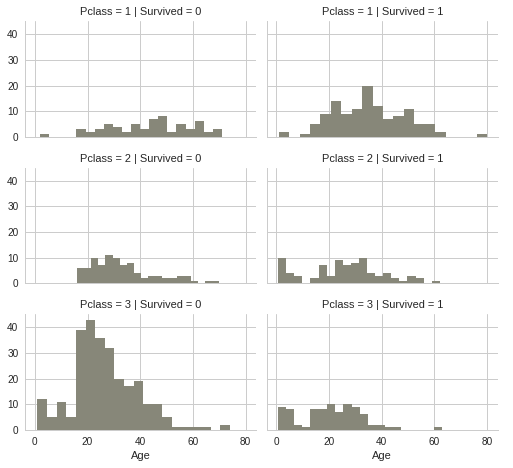

In [12]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20, color=['#878779'])
grid.add_legend();

Half of the passengers from Cherbourg were first class passengers. This is a second clue that suggest a relation between class type and survival.

In [13]:
embark_dummies_titanic  = pd.get_dummies(df['Embarked'])
# embark_dummies_titanic.drop(['S'], axis=1, inplace=True)
df = df.join(embark_dummies_titanic)
df.drop(['Embarked'], axis=1,inplace=True)

In [14]:
# Encoding Pclass feature
pclass = pd.get_dummies( df.Pclass , prefix='Pclass' )
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


Now is time to explore the *fare* feature.

Average fare:             0
0  22.117887
1  48.395408
Max fare:  512.3292
PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                           0
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                       NaN
C                             1
Q                             0
S                             0
Name: 258, dtype: object


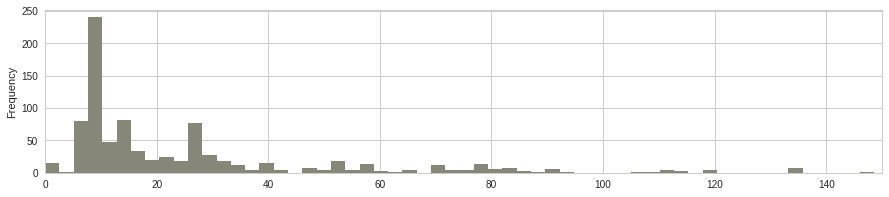

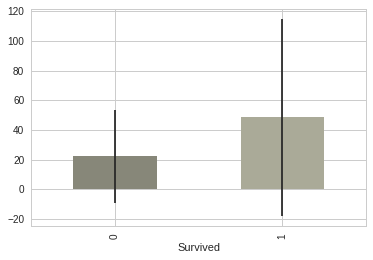

In [15]:
# Fare

# get fare for survived & not survived passengers 
fare_not_survived = df["Fare"][df["Survived"] == 0]
fare_survived = df["Fare"][df["Survived"] == 1]

# get average and std
average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
print("Average fare: ", average_fare)
print("Max fare: ", df.Fare.max())

ind = np.argmax(df.Fare)
print(df.ix[ind,:])

# plot
df['Fare'].plot(kind='hist', figsize=(15,3),bins=200, xlim=(0,150), color=['#878779'])
average_fare.index.names = std_fare.index.names = ["Survived"]
average_fare.plot(yerr=std_fare, kind='bar', legend=False, color=colors)

As seen, on average survivors paid more than non-survivors. There were some millionaires suites on the Titanic on deck B. Probably this is the motivation for outlier fares like 512 pounds. Generally, fares ranged between 0 and 50 pounds 

In [16]:
# Age 

# get average, std, and number of NaN values in titanic_df
average_age   = df["Age"].mean()
median_age    = df["Age"].median()
mode_age      = df["Age"].mode()
std_age       = df["Age"].std()

print("Average Age: ", average_age)
print("Median Age: ", median_age)
print("Mode Age", mode_age)
print("Std: ", std_age)

Average Age:  29.69911764705882
Median Age:  28.0
Mode Age 0    24.0
dtype: float64
Std:  14.526497332334044


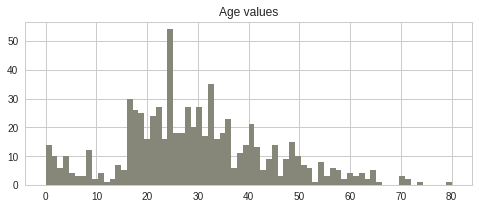

In [17]:
# plot Age values
# NOTE: drop all null values, and convert to int
df['Age'].dropna().astype(int).hist(bins=70, figsize=(8,3), color=["#878779"])
plt.title('Age values')

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


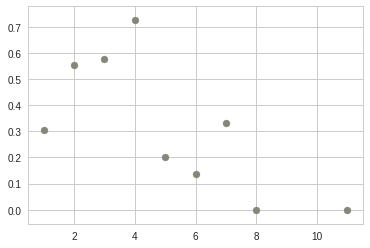

In [18]:
# Explore family survival

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
temp = df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()
print(temp)
plt.scatter(temp.ix[:, 0], temp.ix[:, 1], color=colors[0])

/home/pc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7322: RuntimeWarning: invalid value encountered in greater
  nonzero = np.absolute(c.data) > precision


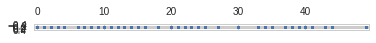

In [19]:
import scipy.sparse as sps
M = sps.csr_matrix(df.Age[0:50].as_matrix())
plt.spy(M, markersize=3)
plt.show()

Age missing values:  177
Age missing values after imputation:  0


/home/pc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


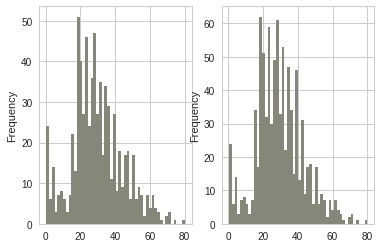

In [20]:
nan_count = df.Age.isnull().sum()
print("Age missing values: ", nan_count)
fig, axs = plt.subplots(1, 2)
df['Age'].plot.hist(bins=50, ax=axs[0], color=colors[0])

rand = np.random.randint(average_age - std_age, average_age + std_age, size = nan_count)
df["Age"][np.isnan(df["Age"])] = rand

print("Age missing values after imputation: ", df.Age.isnull().sum())
df.Age.plot.hist(bins=50, ax=axs[1], color=colors[0])

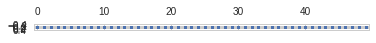

In [21]:
import scipy.sparse as sps
M = sps.csr_matrix(df.Age[0:50].as_matrix())
plt.spy(M, markersize=3)
plt.show()

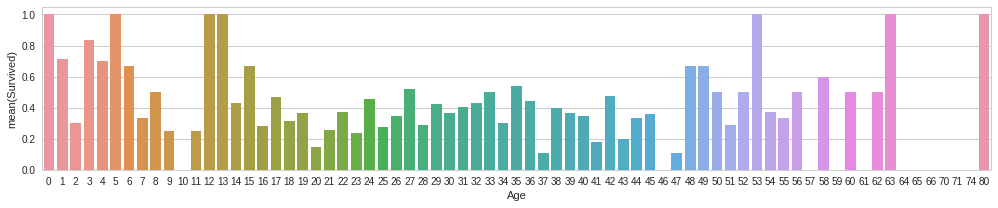

In [22]:
# fraction survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(17,3))
average_age = df[["Age", "Survived"]].dropna().astype(int).groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [23]:
# Title
title = pd.DataFrame()
# we extract the title from each name
title[ 'Title' ] = df['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

# a map of more aggregated titles
# Title_Dictionary = {
#                     "Capt":       "Officer",
#                     "Col":        "Officer",
#                     "Major":      "Officer",
#                     "Jonkheer":   "Royalty",
#                     "Don":        "Royalty",
#                     "Sir" :       "Royalty",
#                     "Dr":         "Officer",
#                     "Rev":        "Royalty",
#                     "the Countess":"Royalty",
#                     "Dona":       "Royalty",
#                     "Mme":        "Mrs",
#                     "Mlle":       "Miss",
#                     "Ms":         "Mrs",
#                     "Mr" :        "Mr",
#                     "Mrs" :       "Mrs",
#                     "Miss" :      "Miss",
#                     "Master" :    "Master",
#                     "Lady" :      "Royalty"

#                     }

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Royalty",
                    "Rev":        "Royalty",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Royalty",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head(10)

,Miss,Mr,Mrs,Officer,Royalty
0,0,1,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,0,0,1
8,0,0,1,0,0
9,0,0,1,0,0


In [24]:
df = df.join(title)

In [25]:
df.head()

print(len(df[(df['Survived']==1) & df['Officer']==1]))
print(len(df[df['Officer']==1]))

print(len(df[(df['Survived']==1) & df['Royalty']==1]))
print(len(df[df['Royalty']==1]))

2
5
29
58


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5]),
 <a list of 16 Text xticklabel objects>)

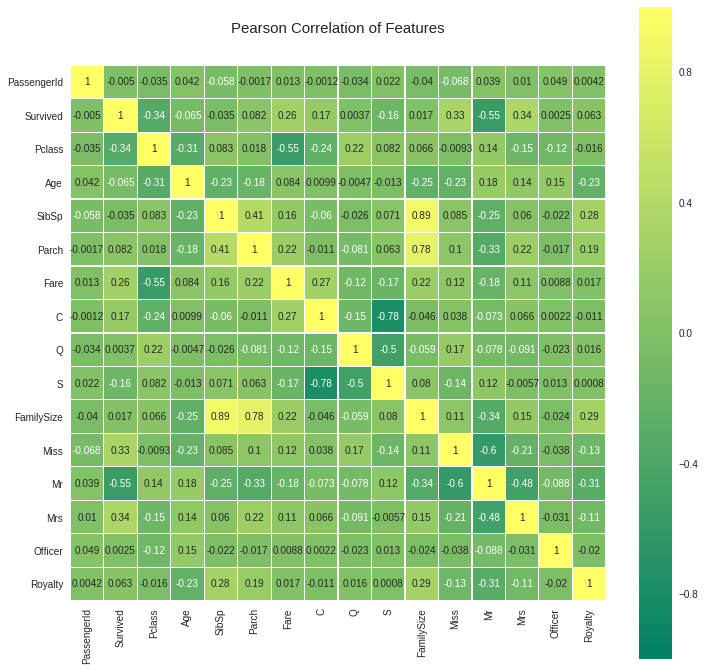

In [26]:
colormap = plt.cm.summer
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
df.drop(['Name', 'Cabin', 'Ticket', 'Name', 'Sex'], axis=1, inplace=True)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

### Discussion

When comparing survivors and deaths based on age, the mean age for survivors was 28.164948 years and for deaths 29.705314 years. It's clear that there were a lot more younger survivors. Based on the data alone, it's hard to tell if there is a significant difference in the mean age. When we compare survivors versus non-survivors, we are essentially comparing two categorical variables from a single population. Therefore, we will use the chi-square test for independence to determine whether age is related to surviving/dying. In our statistical tests, we will use an alpha coefficient of 0.95

To begin, we state the hypothesis:

H<sub>0</sub>: Survival and Age are independent

H<sub>A</sub>: Survival and Age are <em>not</em> independent

As shown below, the results from the test are interesting. The p-value is very high -- 0.99, greater than 0.05, so we do not reject our null hypothesis. This is strong evidence towards survival and age being independent from each other. 


In [32]:
# Store survivor ages into 4 bins of equal length
df['AgeBand'] = pd.cut(df.Age,4)
df1 = df[df.Survived == 1]
df1 = df1.groupby(['AgeBand'])
obs1 = []
for j in  df1.groups:
    obs1.append(len(df1.groups[j]))

# Store non-survivor ages into 4 bins of equal length
df2 = df[df.Survived == 0]
df2 = df2.groupby(['AgeBand'])
obs2 = []
for j in  df2.groups:
    obs2.append(len(df2.groups[j]))

# Create observations array    
# obs = np.array([obs1,obs2])
# print(obs)

obs = np.array(obs1)
print(obs)

import scipy.stats as sp
print 
# Print 
chi2, p, dof, ex = sp.chi2_contingency(obs, correction=False)
print("p-value: ", p)
print("Chi-squared score: ", chi2)
print("Expected values: ", ex)

[ 90 192  55   5]
p-value:  1.0
Chi-squared score:  0.0
Expected values:  [  90.  192.   55.    5.]
